# Integrating the HFM library into pyKasso #
C. Fandel 2020 <br>
Purpose: replace the skfmm module with the agd-hfm module to improve network generation capability

TO-DO:

*Prioritize*
- [X] enable use of isotropic agd algorithm
- [X] remove old/duplicate skfmm functions
- [X] add get/set/update functions
- [ ] rename X,Y indices to ix,iy to reduce confusion with grid
- [X] review simple show functions (show nodes/links, add map legend)
- [ ] allow iteration over multiple outlets
    - [ ] CURRENTLY HERE - need to revisit network construction to make sure that multiple connected outlets are supported
- [ ] allow assigning specific inlets to specific outlets
- [X] add options in settings file to shuffle inlets and/or shuffle outlets
- [X] change DEM input file for orientations to be a map of the contact elevation, not the land surface
- [X] test valley1 with fractures
- [X] test valley1 with isotropic fm
- [X] test with polygon
- [X] test inlets and outlets with composite and generate settings
- [ ] test valley1 with vertical slice & water table
- [X] test betteraz with Riemann
- [X] test Gottesacker 2D
- [ ] update process diagram


*Useful (save for later)*
- [ ] import GSLIB file in old format for backwards compatibility
- [ ] import orientations from GSLIB file (calculate from potential?)
- [ ] add a grid function to convert indices to coordinates and vice-versa (use same as hfm built-in?)

### Setup & imports ###
Need to import a local version of pykasso be able to make and test changes.
Use one of the two methods below (but not both).
Question: Is one way better than the other in some way?

In [18]:
method = 2

#Method 1: using importlib
if method==1:
    import importlib.util
    spec = importlib.util.spec_from_file_location('pykasso', 'C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso/base.py')
    pk = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(pk)

#Method 2: setting the path variable to the path to the local version 
#This version allows reloading the module to see changes
if method==2:
    import sys
    sys.path.append('C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso') #path to local version of package
    import base as pk  #in this case, "base" is the name of the .py file with all of the pykasso functions in it

#Check that it worked:
#catchment = pk.SKS() #create a simple model
#You should see a printed statement indicating that you are using a development version of the package.
#If you do not see this statement, you are using the main version, and changes you make to the local version will have no effect.

In [19]:
#Import the rest of the modules needed:
import os            
import sys           
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import karstnet as kn

#all fast-marching-related imports
import agd
from agd import Eikonal
from agd.Metrics import Riemann
#from agd.Plotting import quiver
#from agd import LinearParallel as lp
#from agd import AutomaticDifferentiation as ad
#norm_infinity = ad.Optimization.norm_infinity

#Local modules:
import importlib.util
spec = importlib.util.spec_from_file_location('swmmpy', 'C:/Users/Chloe/Documents/GitHub/gottesacker/swmmpy.py')
sp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sp)

#os.chdir('C:\\Users\\Chloe\\Documents\\GitHub\\pyKasso')
os.getcwd()

'C:\\Users\\Chloe\\Documents\\GitHub\\pyKasso\\notebooks'

### Test on built-in Betteraz system ###

CAUTION: You are using the development version of this package.


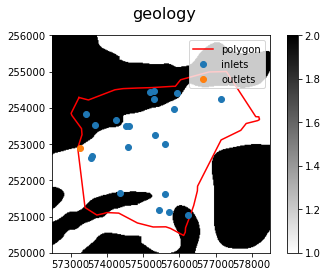

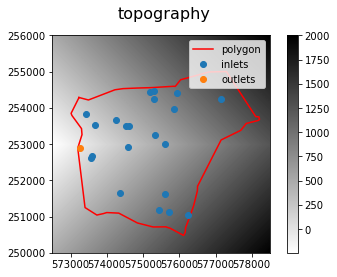

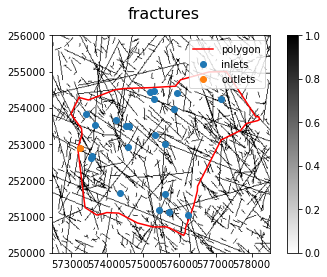

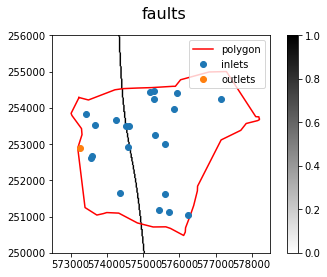


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd


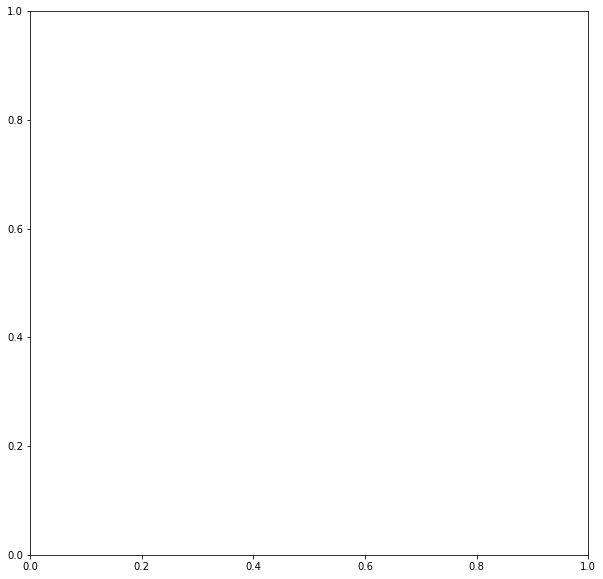

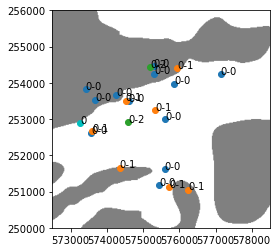

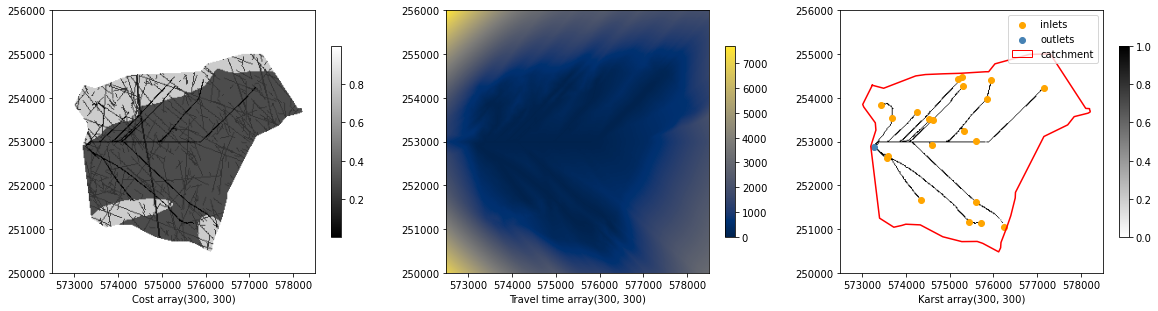

In [340]:
importlib.reload(pk)

catchment = pk.SKS('inputs/betteraz/betteraz_cas_1.yaml')
#catchment = pk.SKS() #test default
catchment.show_catchment(data='geology')
catchment.show_catchment(data='topography')
catchment.show_catchment(data='fractures')
catchment.show_catchment(data='faults')
catchment.compute_karst_network()
catchment.show()

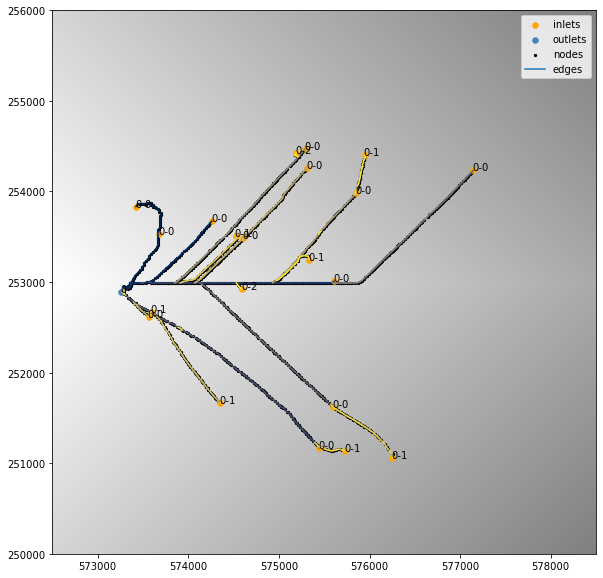

In [342]:
f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(catchment.geology.data['topography']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax)

### Simple one-valley system ###

CAUTION: You are using the development version of this package.


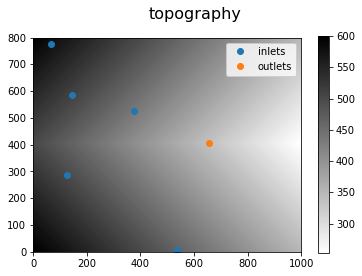


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


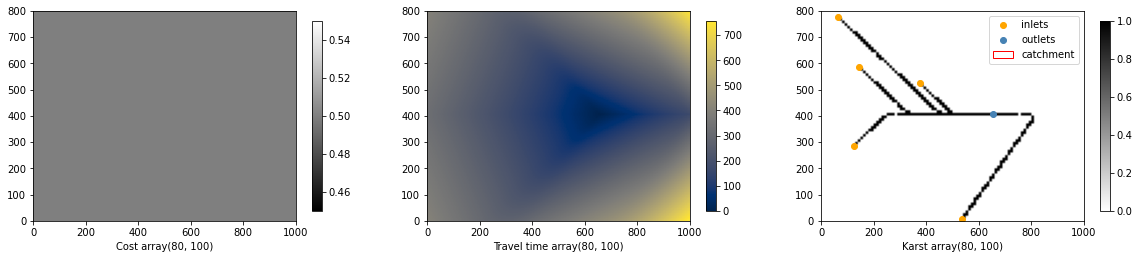

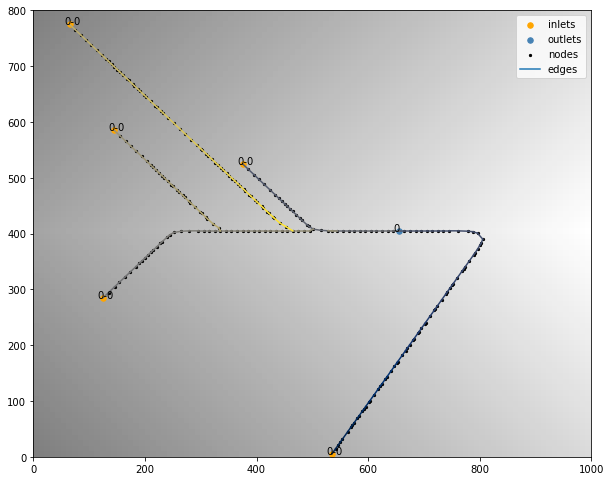

In [409]:
importlib.reload(pk)

catchment = pk.SKS('inputs/valley1/settings.yaml') #import settings and options from input folder
catchment.show_catchment(data='topography')
catchment.compute_karst_network()
catchment.show()

f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(catchment.geology.data['topography']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax)

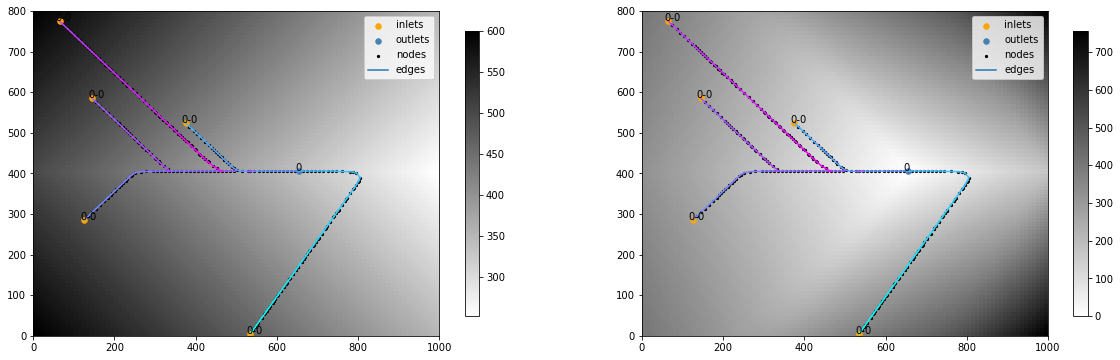

In [410]:
f,ax = plt.subplots(1,2, figsize=(20,15))
m = catchment.geology.data['topography']['data']
im = ax[0].imshow(m, origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax[0], shrink=0.35)
im = ax[1].imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax[1], shrink=0.35)
catchment.show_network(ax=ax[0], cmap='cool')
catchment.show_network(ax=ax[1], cmap='cool')

### Run on Gottesacker 2D ###

CAUTION: You are using the development version of this package.


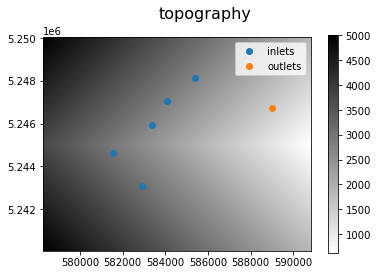


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


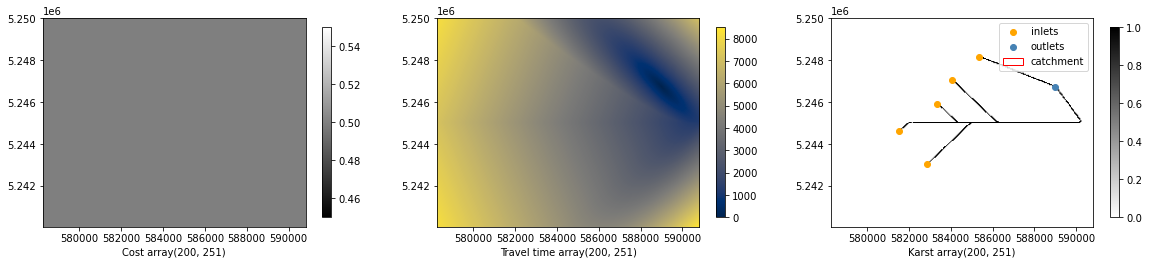

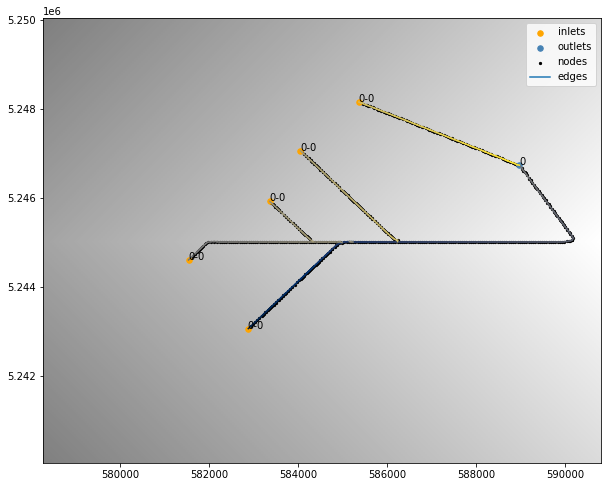

In [412]:
importlib.reload(pk)

catchment = pk.SKS('inputs/gottesacker/settings.yaml') #import settings and options from input folder
catchment.show_catchment(data='topography')
catchment.compute_karst_network()
catchment.show()

f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(catchment.geology.data['topography']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax)

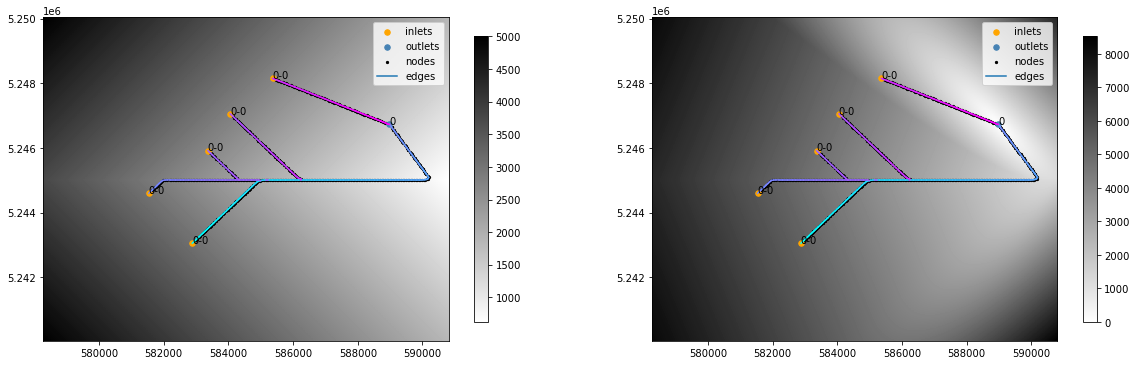

In [413]:
f,ax = plt.subplots(1,2, figsize=(20,15))
m = catchment.geology.data['topography']['data']
im = ax[0].imshow(m, origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax[0], shrink=0.35)
im = ax[1].imshow(catchment.maps['time'][0], origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax[1], shrink=0.35)
catchment.show_network(ax=ax[0], cmap='cool')
catchment.show_network(ax=ax[1], cmap='cool')

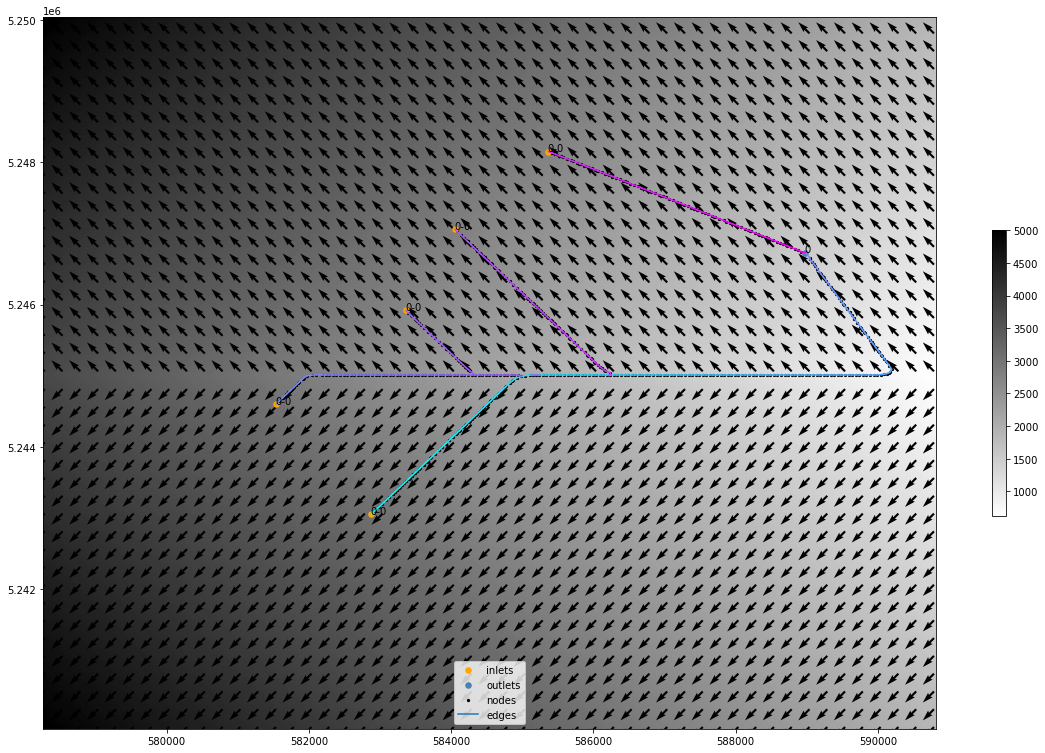

In [417]:
f,ax = plt.subplots(1,1, figsize=(20,15))
m = catchment.geology.data['topography']['data']
im = ax.imshow(m, origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax, shrink=0.35)
skip=(slice(None,None,5),slice(None,None,5))
plt.quiver(catchment.grid.X[skip], catchment.grid.Y[skip], 
           catchment.geology.data['orientationy']['data'][skip], catchment.geology.data['orientationx']['data'][skip], scale=20)
catchment.show_network(ax=ax, cmap='cool')

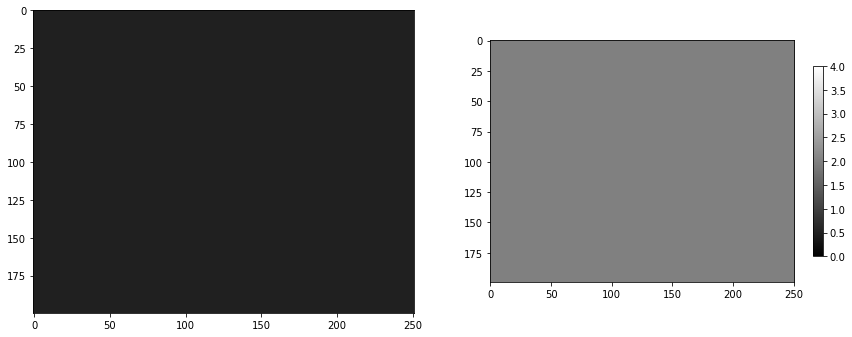

In [378]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(catchment.maps['alpha'][0], cmap='gray', vmin=0, vmax=4)
ax = f.add_subplot(122)
im = ax.imshow(catchment.maps['beta'][0], cmap='gray', vmin=0, vmax=4)
plt.colorbar(im, shrink=0.35)

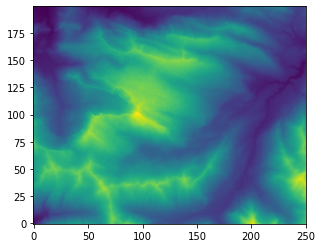

In [352]:
plt.imshow(catchment.geology.data['topography']['data'], origin='lower')

### Inputs/outputs for fast-marching ###

For agd-hfm: <br>
```
hfmIn = Eikonal.dictIn({
    'model':             'Riemann3', #three-dimensional Riemannian eikonal equation (for 2D: Riemann2, for isotropic: Isotropic2 or 3)
    'order':              2,         #recommended setting: 2
    'exportValues':       1,         #output travel time field
    'exportGeodesicFlow': 1          #output walker paths
})
hfmIn.SetRect(sides=[[xmin,xmax],[ymin,ymax],[zmin,zmax]],dims=[xres,yres,zres])
for seed in springs:
    hfmIn['seed'] = seed
    for tip in tips:
        hfmIn['tips'] = [tip]
        hfmIn['metric']    =  F
        hfmOut = hfmIn.Run()
        paths = hfmOut['geodesics']
``` 
       
- seed - coordinates of travel time=0 location, i.e. the spring the conduits are traveling to (array of [x y z])
- tips - coordinates of starting points for walkers, i.e. the inlets (array of [[x1 y1 z1] [x2 y2 z2]]
- metric - travel cost through each cell, i.e. the inverse of the velocity (array of cost values, higher=slower to travel through). If using anisotropic FM, this will include travel cost both parallel and perpendicular to the cell's gradient.
    - to calculate travel cost metric, need:
        - DxV,DyV,DzV: x and y components of gradient in each cell of array, calculate from DEM or from geologic model orientations in each cell (arrays of dim (xres,yres)).
        - alpha: travel cost in same direction as gradient (array of dim (xres,yres) of values between 0 and 1, higher=slower)
        - beta: travel cost perpendicular to gradient (same format as alpha)
- model - which fast-marching algorithm to use (string, either Riemann2, Riemann3, Isotropic2, Isotropic3).

